# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** BISI-KAZEEM ABIADE


**Student ID:** 222294384

<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations

### **Business Understanding**
Vera Selection is a business group that operates several businesses in Victoria, Melbourne, including Vera Selection Resort (VSR). VSR is a popular holiday destination and offers luxurious accommodations, recreational activities, and fine dining to its guests. However, the resort has been experiencing a high number of room cancellations, which is negatively impacting their revenue. VSR wants to explore their business data to understand their business better, improve performance, and reduce room cancellations.

### **Business Problem**
One of the main business problems that VSR is facing is a high number of room cancellations, which is a common challenge for many hotels and resorts. When guests cancel their bookings, the resort loses revenue and may have to incur additional costs to fill the empty rooms. Moreover, last-minute cancellations can make it challenging for the resort to manage their resources effectively, which can impact the overall guest experience. In the case of VSR, the management team has noticed that the number of cancellations is higher than they would like, and they want to explore ways to reduce them.

### **Aim of the Project**
The aim of this project is to explore the dataset provided by VSR and develop a machine learning model that can predict room cancellations based on the booking details. The project will identify the factors that are contributing to the high number of cancellations and provide insights and recommendations to VSR. To achieve this aim, the project will involve several stages, including data exploration, data preprocessing, feature engineering, model selection, and model evaluation.

### **Recommendations for VSR**
Based on the insights gained from the project, VSR can take several steps to reduce room cancellations. For example, VSR can offer flexible cancellation policies or provide incentives to customers who do not cancel their bookings. VSR can also use the model to identify customers who are likely to cancel their bookings and take proactive steps to retain them, such as offering discounts or special promotions. Additionally, VSR can use the insights gained from the project to improve their booking and reception systems to reduce the likelihood of cancellations. For instance, they can make the booking process more user-friendly, improve the website's performance, or optimize the pricing strategy to encourage customers to finalize their bookings. Finally, VSR can leverage the insights from the project to enhance their overall guest experience, such as providing personalized recommendations, offering additional services, or optimizing the resort's capacity and resources to better match the guests' needs and preferences.

<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation


In [1]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
# Load requires libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Load data from CloudDeakin

# Alternatively, use the url below to load data
url = 'https://raw.githubusercontent.com/thuc-github/MIS710-T12023/main/A1/VS_Booking.csv'

data = pd.read_csv("VS_Booking.csv")
data.head()

,Booking_ID,RoomType,FromDate,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Previous Cancellations,Average Room Price,Booking Status
0,INN14254,Neptune,3/10/2018,2,0,Buffet Breakfast,1,0,1,3,0,219,Online,0,0,102.85,Canceled
1,INN16192,Venus,30/12/2018,2,0,Buffet Breakfast,1,0,2,2,0,23,Online,0,0,133.55,Arrived
2,INN04354,Neptune,19/8/2018,2,0,Buffet Breakfast,1,0,2,3,0,303,Offline,0,0,78.00,Arrived
3,INN01119,Venus,15/8/2018,2,0,Buffet Breakfast,0,0,1,2,0,133,Online,0,0,113.60,Canceled
4,INN17611,Neptune,31/8/2018,1,0,Buffet Breakfast,0,0,0,2,0,70,Online,0,0,121.50,Canceled


### Data Cleaning

In [54]:
rows = data.shape[0]
columns = data.shape[1]

print(f"The data has {rows} records and {columns} features.")

The data has 32647 records and 17 features.


In [55]:
duplicates = data.duplicated().sum()

print(f"The data has {duplicates} duplicates.")

The data has 0 duplicates.


In [56]:
data.isnull().sum()

Booking_ID                    0
RoomType                      0
FromDate                      0
Adults                        0
Children                      0
Breakfast                     0
Number of Special Requests    0
Airport Pickup                0
Weekend Nights                0
Weeknights                    0
Loyalty Points                0
Lead time in days             0
Booking Type                  0
Existing Customer             0
Previous Cancellations        0
Average Room Price            0
Booking Status                0
dtype: int64

In [57]:
data.dtypes

Booking_ID                     object
RoomType                       object
FromDate                       object
Adults                          int64
Children                        int64
Breakfast                      object
Number of Special Requests      int64
Airport Pickup                  int64
Weekend Nights                  int64
Weeknights                      int64
Loyalty Points                  int64
Lead time in days               int64
Booking Type                   object
Existing Customer               int64
Previous Cancellations          int64
Average Room Price            float64
Booking Status                 object
dtype: object

In [58]:
for col in data.columns[1:]:
    print(f"\n{col}")
    print(data[col].value_counts())


RoomType
RoomType
Neptune    25380
Venus       5415
Jupiter     1094
Saturn       609
Mercury      142
Mars           7
Name: count, dtype: int64

FromDate
FromDate
13/10/2018    229
16/10/2017    217
15/6/2018     211
24/6/2018     192
13/5/2018     188
             ... 
5/7/2017        2
3/7/2017        2
12/7/2017       2
21/7/2017       1
24/7/2017       1
Name: count, Length: 551, dtype: int64

Adults
Adults
2    23472
1     6937
3     2097
0      126
4       15
Name: count, dtype: int64

Children
Children
0     30240
1      1440
2       945
3        19
9         2
10        1
Name: count, dtype: int64

Breakfast
Breakfast
Buffet Breakfast           25038
Not Selected                4586
Luxury Buffet Breakfast     3018
Super VIP Breakfast            5
Name: count, dtype: int64

Number of Special Requests
Number of Special Requests
0    17805
1    10221
2     3937
3      611
4       66
5        7
Name: count, dtype: int64

Airport Pickup
Airport Pickup
0    31633
1     1014
Name:

In [59]:
cats_cols = []
for col in data.columns:
    unique_count = data[col].nunique() 
    if unique_count< 7:
        cats_cols.append(col)
        print(col,unique_count)

RoomType 6
Adults 5
Children 6
Breakfast 4
Number of Special Requests 6
Airport Pickup 2
Booking Type 5
Existing Customer 2
Booking Status 2


There are 9 features with less than 7 unique values, so for this analysis we will change them to "category" type

In [60]:
for col in cats_cols:
    data[col] = data[col].astype('category')
    # print(data[col].dtype)

In [61]:
data.dtypes

Booking_ID                      object
RoomType                      category
FromDate                        object
Adults                        category
Children                      category
Breakfast                     category
Number of Special Requests    category
Airport Pickup                category
Weekend Nights                   int64
Weeknights                       int64
Loyalty Points                   int64
Lead time in days                int64
Booking Type                  category
Existing Customer             category
Previous Cancellations           int64
Average Room Price             float64
Booking Status                category
dtype: object

In [62]:
num_cols = [col for col in data.columns if data[col].dtype == "int64" or data[col].dtype == "float64"]

print(f"There are {len(num_cols)} numerical features in the dataset\n")


print(f"Numericals: {num_cols}")

There are 6 numerical features in the dataset

Numericals: ['Weekend Nights', 'Weeknights', 'Loyalty Points', 'Lead time in days', 'Previous Cancellations', 'Average Room Price']


* The "From Date" feature is read in as an "object" data type instead of a "date" datatype.
* But converting the column to datetime shows an error **TypeError: invalid string coercion to datetime for "29/2/2018" at position 140**

Let's investigate this...

In [63]:
data.query('FromDate == "29/2/2018"').shape[0]

32

* We see there are 32 records with a FromDate of 29/2/2018 which does not exist as 2018 is not a leap year.
* To correct this, we will assume these dates are just 28/2/2018

In [64]:
data['FromDate'] = data['FromDate'].replace("29/2/2018", "28/2/2018")

* We also notice that in the FromDate column, there are invalid date entries
* In this case, we will remove them from the dataset

In [65]:
data.query("FromDate == 'FromDate'")

,Booking_ID,RoomType,FromDate,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Previous Cancellations,Average Room Price,Booking Status
2187,INN13020,Neptune,FromDate,2,0,Buffet Breakfast,1,0,0,3,0,136,Online,0,0,105.30,Arrived
5997,INN34720,Neptune,FromDate,2,0,Buffet Breakfast,0,0,0,1,0,105,Offline,0,0,75.00,Canceled
6923,INN30380,Neptune,FromDate,1,0,Luxury Buffet Breakfast,0,0,0,2,0,74,Offline,0,0,80.00,Arrived
21849,INN21700,Neptune,FromDate,1,0,Buffet Breakfast,0,0,0,1,12,0,Corporate,1,3,65.00,Arrived
24553,INN08680,Neptune,FromDate,2,0,Buffet Breakfast,2,0,1,1,0,85,Online,0,0,114.30,Arrived
29925,INN26040,Neptune,FromDate,2,0,Buffet Breakfast,0,0,0,2,0,0,Online,0,0,80.39,Arrived
31395,INN17360,Mercury,FromDate,4,0,Buffet Breakfast,0,0,2,1,0,61,Online,0,0,256.10,Canceled


In [66]:
data = data.drop(data[data['FromDate'] == "FromDate"].index)


In [67]:
data['FromDate'] = pd.to_datetime(data['FromDate'], dayfirst=True, format = "%d/%m/%Y")

In [68]:
data['FromDate'].dtypes

dtype('<M8[ns]')

In [69]:
rows = data.shape[0]
columns = data.shape[1]

print(f"The data now has {rows} records and {columns} features.")

The data now has 32640 records and 17 features.


In [70]:
# removing the suffix "Breakfast" from the values in the "Breakfast" column for easy analysis
data['Breakfast'] = data['Breakfast'].map(lambda x:x.replace(" Breakfast", ""))

### Data Exploration and Visualization

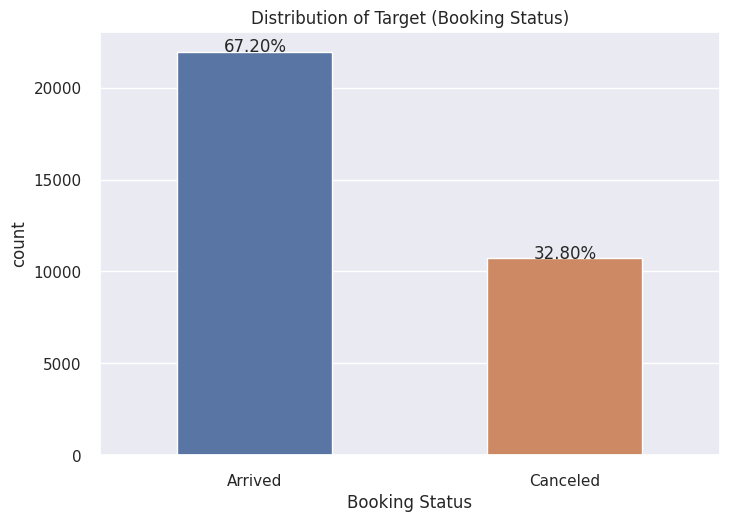

In [71]:
target = "Booking Status"
ax = sns.countplot(data = data , x = target, width= 0.5)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()*100/data.shape[0]), (p.get_x()+0.15, p.get_height()+0.65))

plt.title("Distribution of Target (Booking Status)")
    
plt.show()


* 67.2% of the records in the dataset arrived for their Bookings 
* 38.2% of the records canceled their Bookings.

We notice a class imbalance in our target variable which means that regular metrics like accuracy for the ML model will not be useful.

### Categoricals vs Target

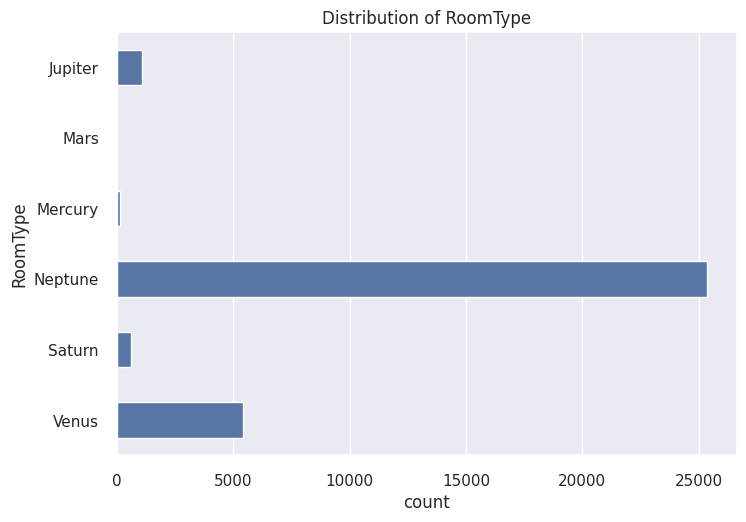

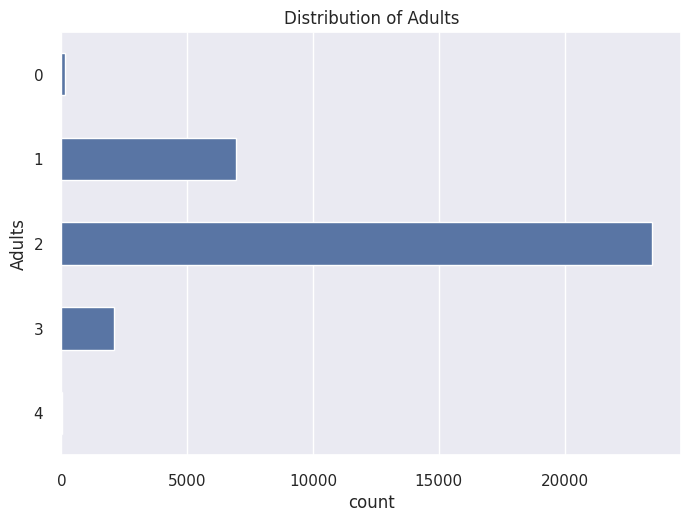

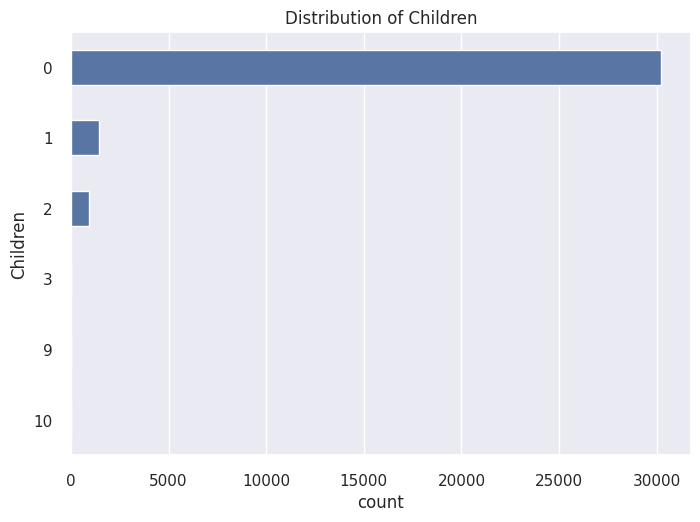

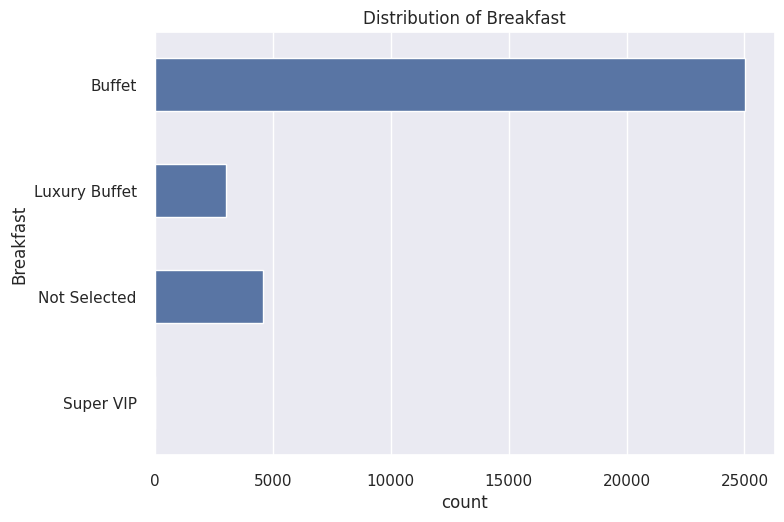

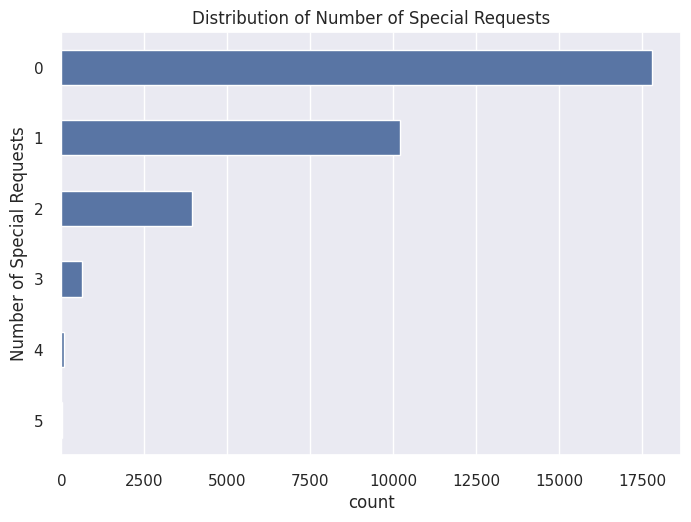

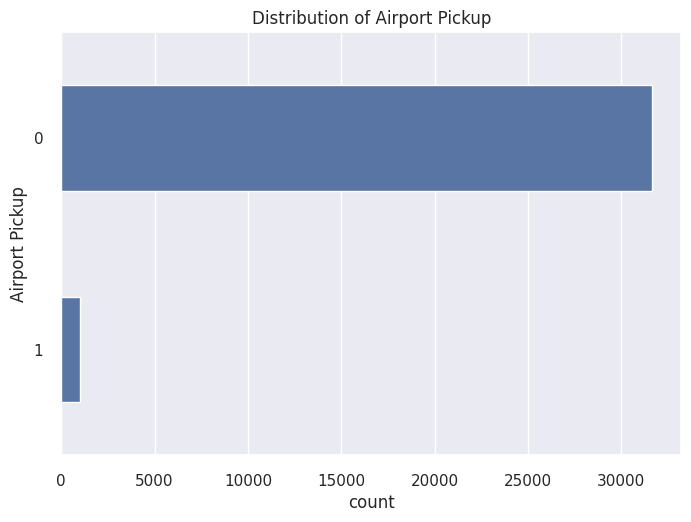

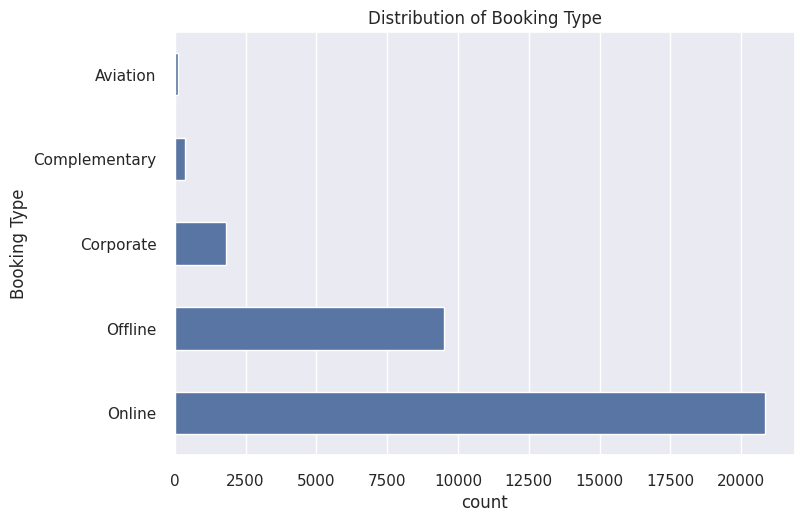

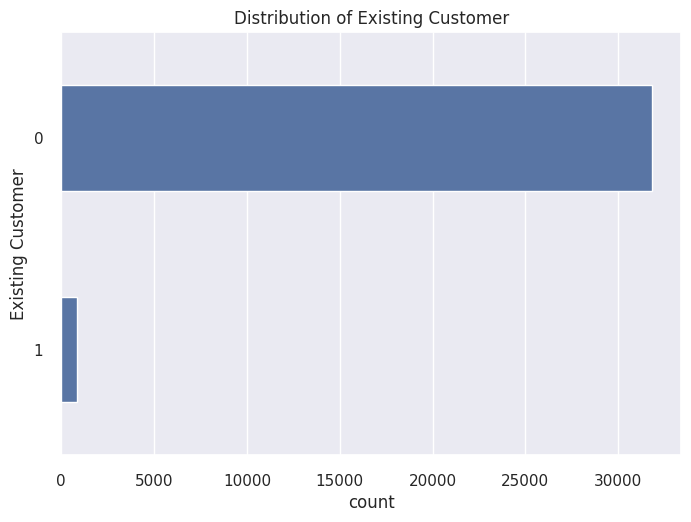

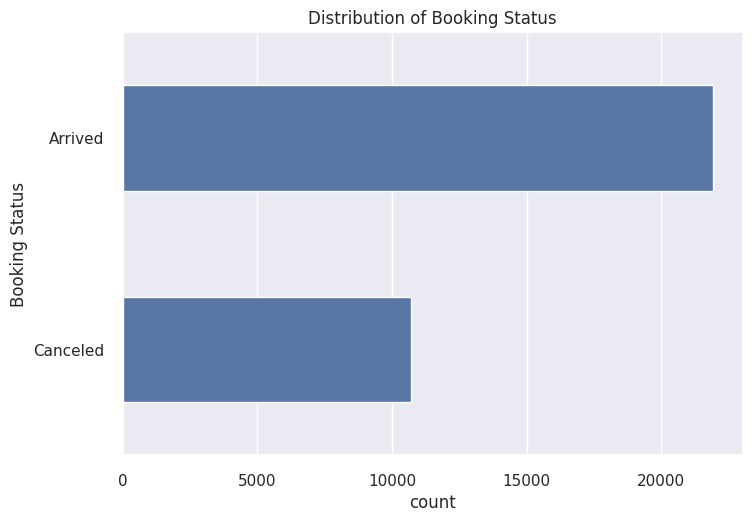

In [72]:
color_palette = sns.color_palette(n_colors = 1)
for col in cats_cols:
    sns.countplot(data = data, y = col, palette = color_palette, width=0.5)
    plt.title(f'Distribution of {col}')
    plt.show()

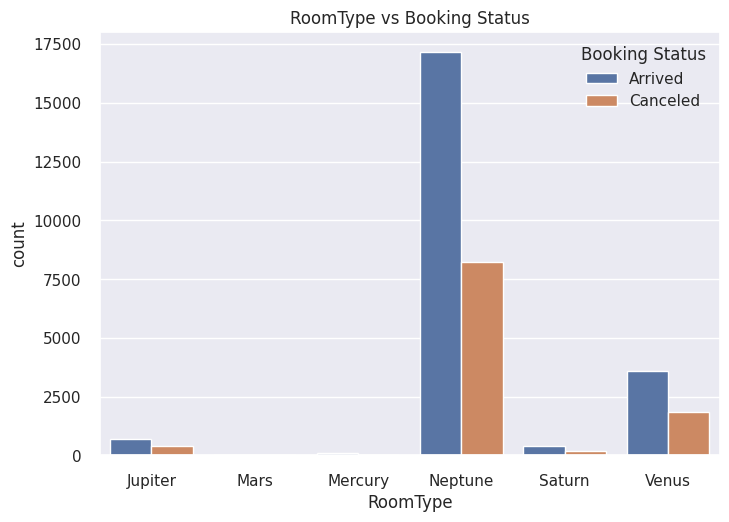

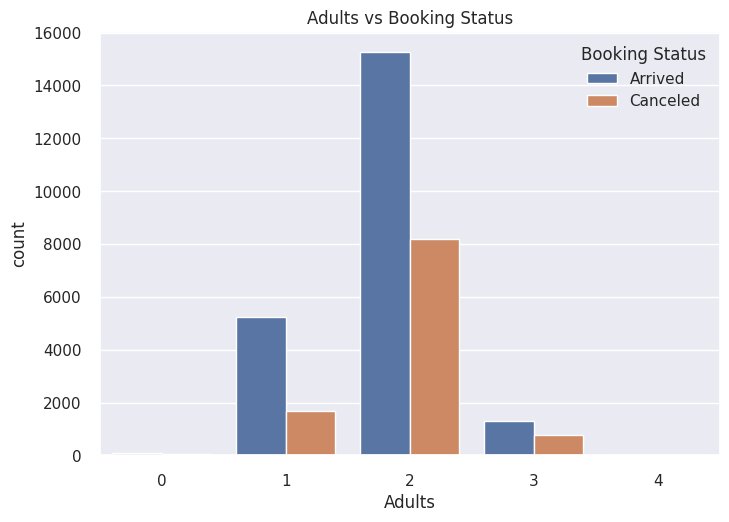

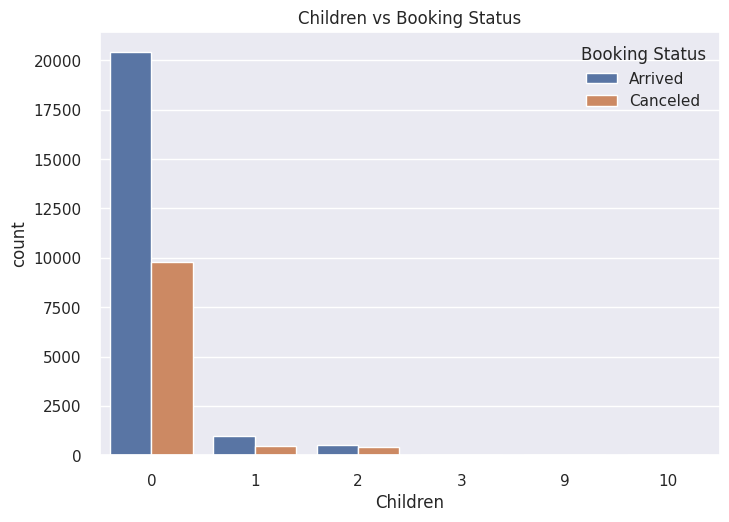

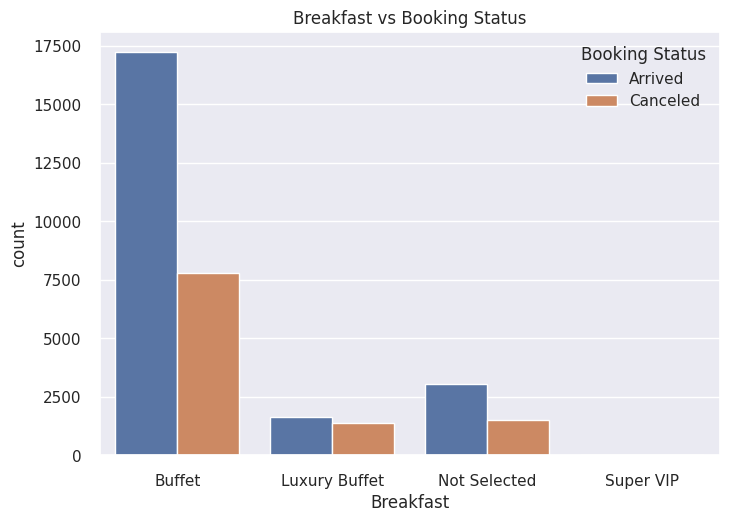

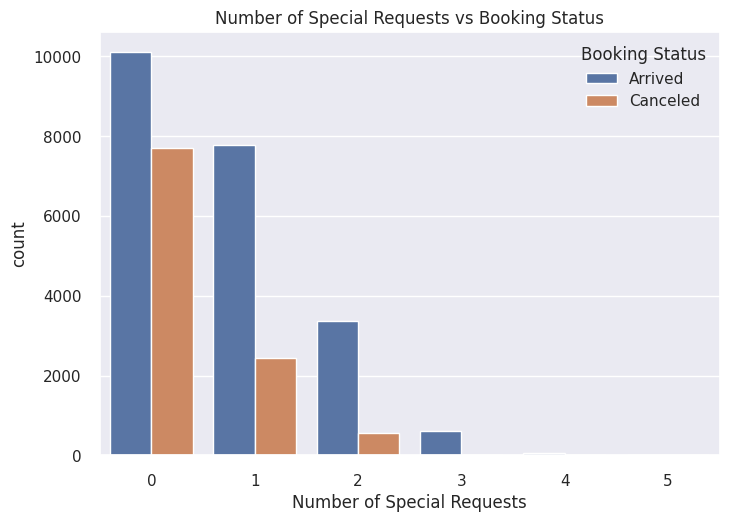

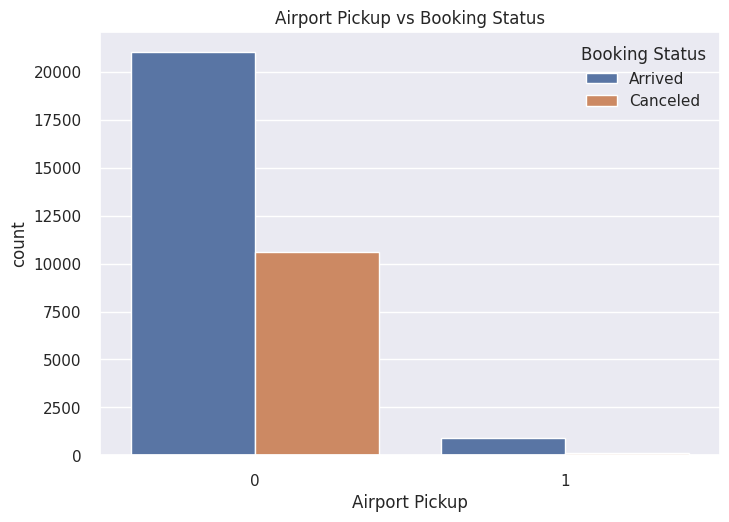

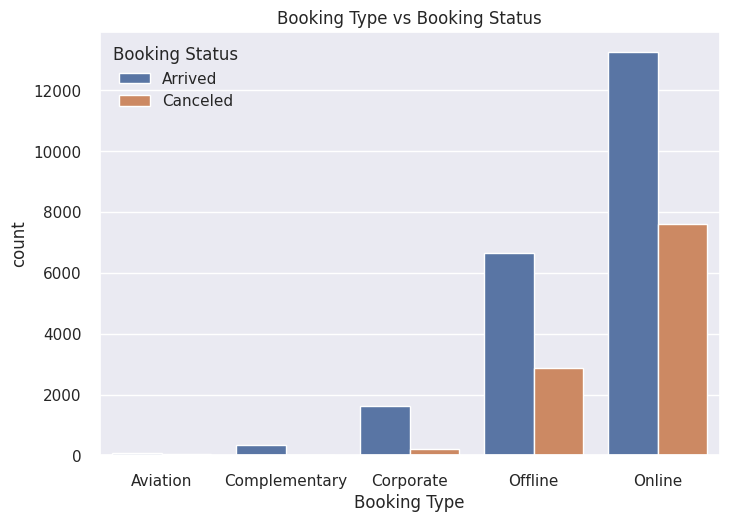

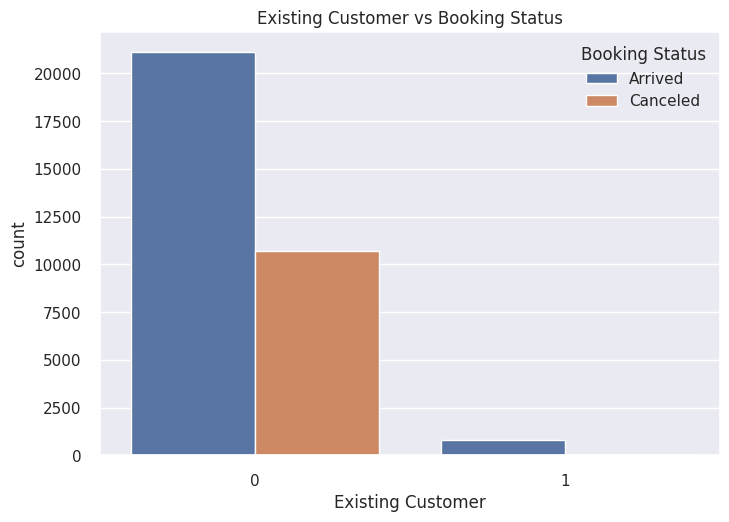

In [73]:
color_palette = sns.color_palette(n_colors = 1)
for col in cats_cols[:-1]:

        sns.countplot(data=data, x = col, hue = target)
        plt.title(f"{col} vs {target}")

        plt.show()
    

* Neptune rooms received the most bookings with a corresponding high amount of cancellations compared to other room types
* we see that most bookings were made for 2 adults for a room which may mean couples or friends. 
* we see that most bookings had no children which is not surprising 
* Most bookings were for Buffet Breakfast than any of the other types of Breakfast. We see zero or little bookings for the Super VIP Breakfast 
* As the number of special requests increased, the number of cancellations reduced. Most of the bookings provided 0 special requests which might mean the customers had no idea that they could make special requests. 
* All the bookings which required Airport pickups arrived i.e no cancellations for all airport pickups.
* All complementary bookings arrived and most bookings were made Online with very high cancellations. There are few or no aviation bookings. All existing customers arrived for their bookings 


### Date vs Booking Status

month
October      4795
September    4162
August       3456
June         2857
December     2716
November     2696
July         2621
April        2443
May          2345
March        2111
February     1534
January       904
Name: count, dtype: int64


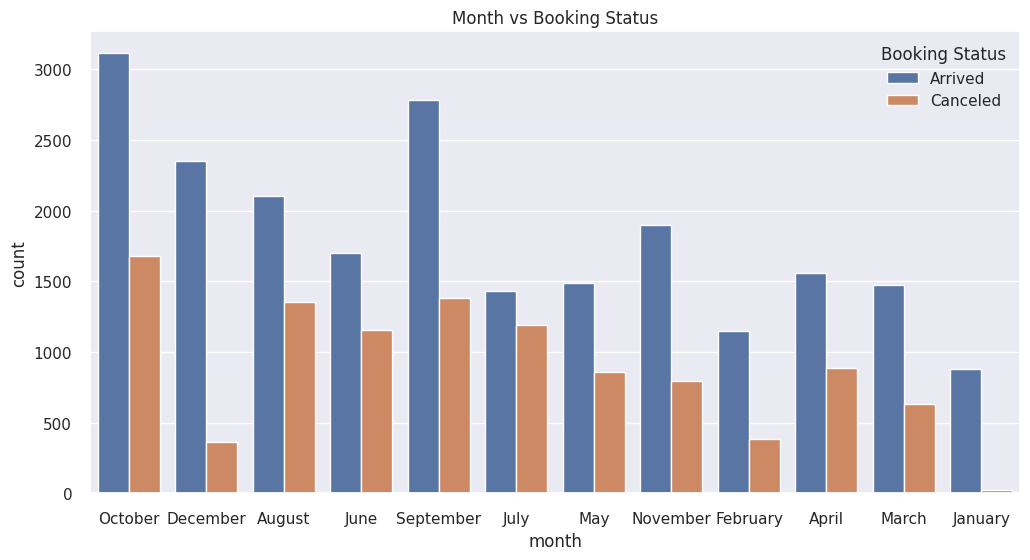

In [74]:

data['month'] = data['FromDate'].dt.month_name()
print(data['month'].value_counts())
plt.figure(figsize=[12,6])
sns.countplot(data = data, x='month', hue = target)
plt.title("Month vs Booking Status");


day
Sunday       5534
Saturday     4910
Monday       4816
Wednesday    4663
Tuesday      4382
Friday       4262
Thursday     4073
Name: count, dtype: int64


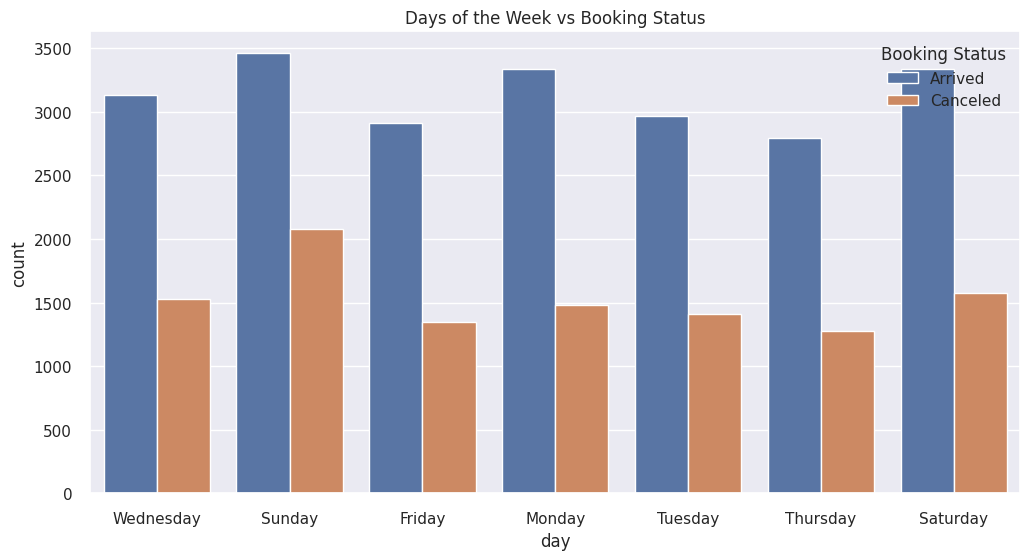

In [75]:
data['day'] = data['FromDate'].dt.day_name()
print(data['day'].value_counts())
plt.figure(figsize=[12,6])
sns.countplot(data = data, x="day", hue = target)
plt.title("Days of the Week vs Booking Status");

year
2018    26782
2017     5858
Name: count, dtype: int64


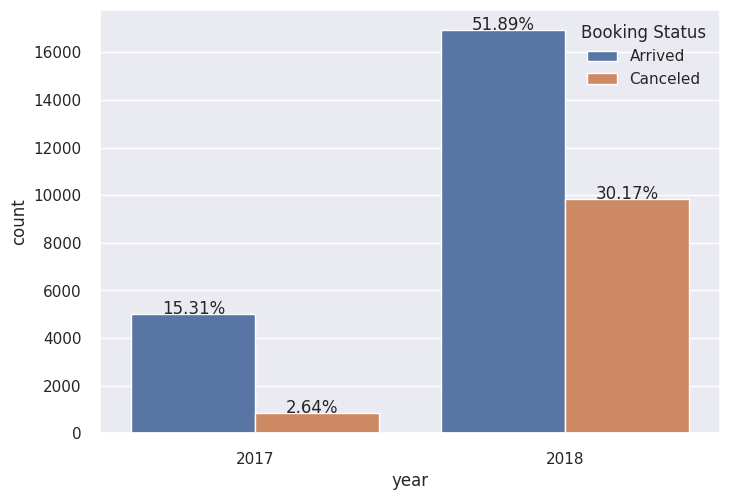

In [76]:
data['year'] = data['FromDate'].dt.year
print(data['year'].value_counts())
ax = sns.countplot(data=data, x='year', hue = target)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()*100/data.shape[0]), (p.get_x()+0.1, p.get_height()+0.7))

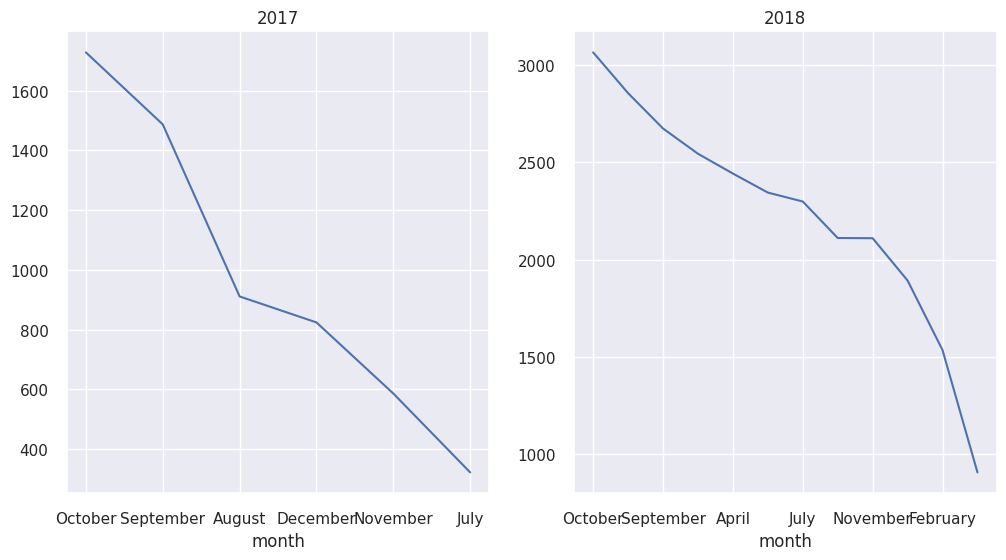

In [77]:


data_2017 = data.query("year == 2017")
data_2018 = data.query("year == 2018")

fig,axs = plt.subplots(1,2, figsize=[12,6])
data_2017['month'].value_counts().plot(kind='line', ax=axs[0])
axs[0].set_title("2017")

data_2018['month'].value_counts().plot(kind='line',ax=axs[1])
axs[1].set_title("2018");

FromDate
2018-10-13    229
2017-10-16    217
2018-06-15    211
2018-06-24    192
2018-05-13    188
Name: count, dtype: int64


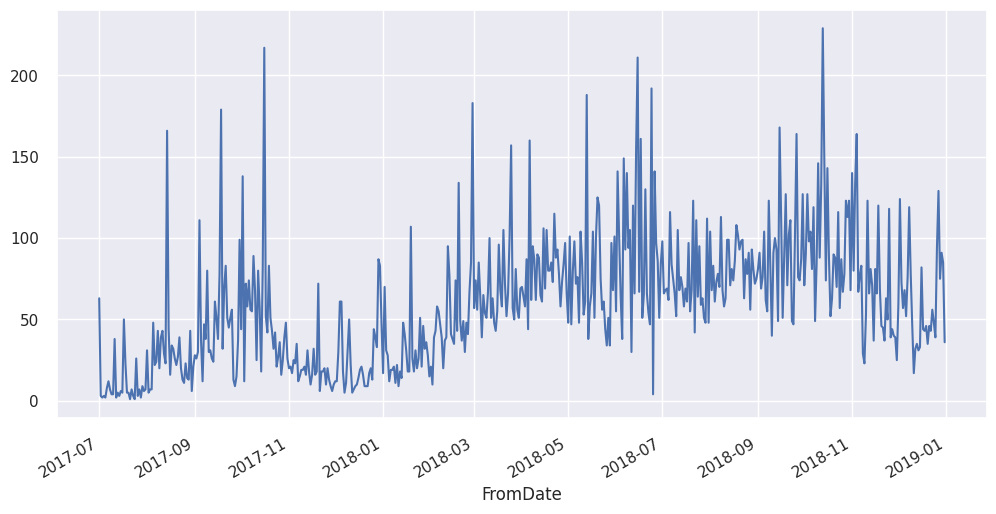

In [78]:
print(data['FromDate'].value_counts().head())

plt.figure(figsize = [12, 6])
data['FromDate'].value_counts().plot(kind='line');


* Month, day and year were extracted from the “FromDate” column for easier analysis and model prediction. We see that most bookings were made in October, September, August and June. This is not surprising as Labour day is in October, the king’s birthday in June and other public holidays spread across these months. 
* Most bookings were made on Saturdays and Sundays with Thursdays and Fridays having the least number of cancellations.


### Numericals Vs Target

In [79]:
data.describe()

,FromDate,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Previous Cancellations,Average Room Price,year
count,32640,32640.000000,32640.000000,32640.000000,32640.000000,32640.000000,32640.000000,32640.000000
mean,2018-05-24 22:15:26.470588160,0.810692,2.208425,0.151930,85.423744,0.022733,103.511597,2017.820527
min,2017-07-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000
25%,2018-02-28 00:00:00,0.000000,1.000000,0.000000,17.000000,0.000000,80.300000,2018.000000
50%,2018-06-12 00:00:00,1.000000,2.000000,0.000000,57.000000,0.000000,99.470000,2018.000000
75%,2018-09-19 00:00:00,2.000000,3.000000,0.000000,127.000000,0.000000,120.000000,2018.000000
max,2018-12-31 00:00:00,7.000000,17.000000,58.000000,443.000000,13.000000,540.000000,2018.000000
std,NaN,0.872827,1.416282,1.715258,86.200927,0.362253,35.117577,0.383754


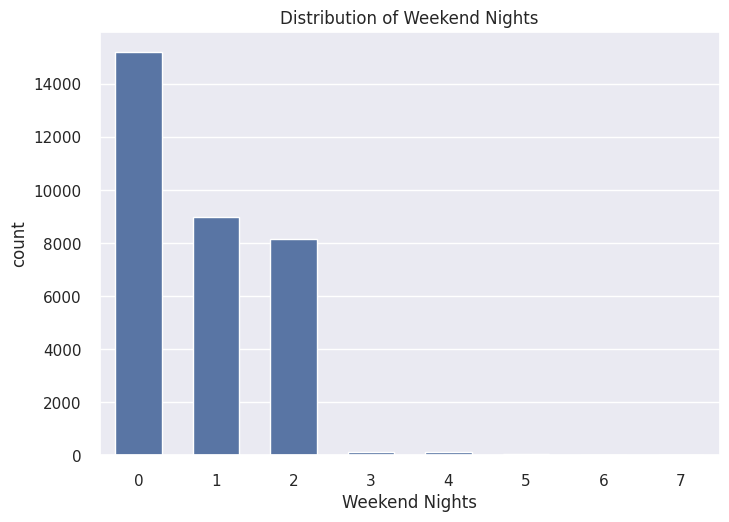

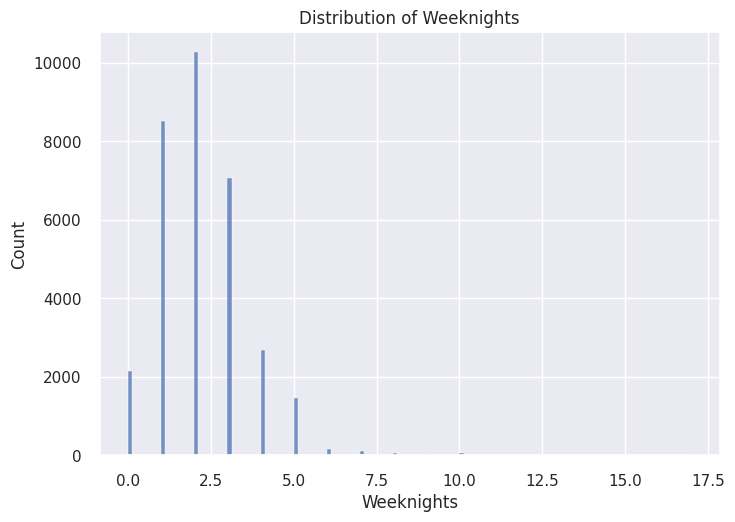

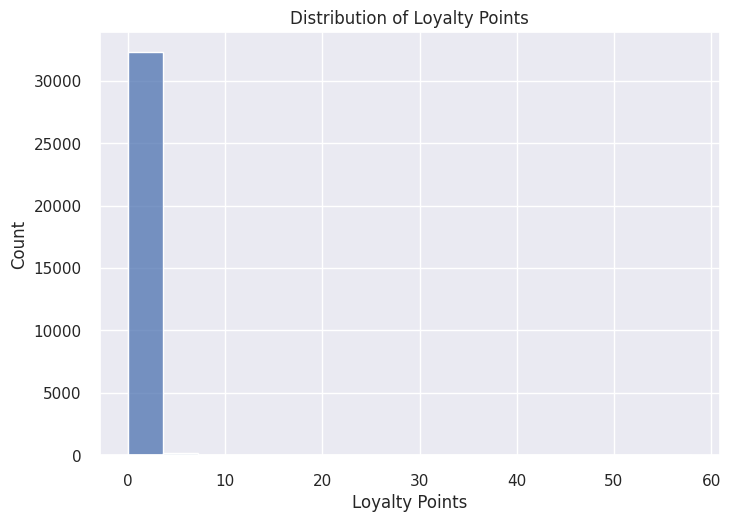

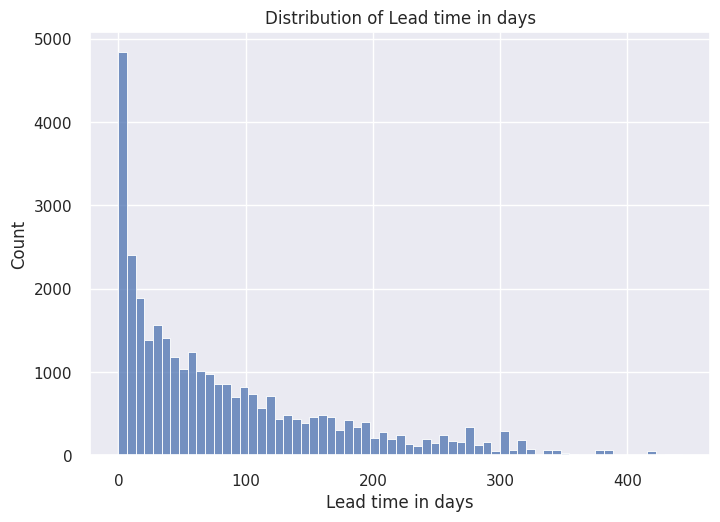

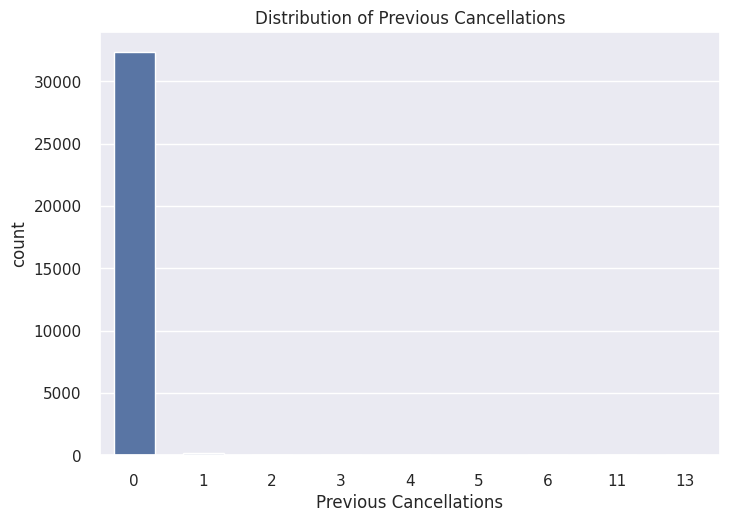

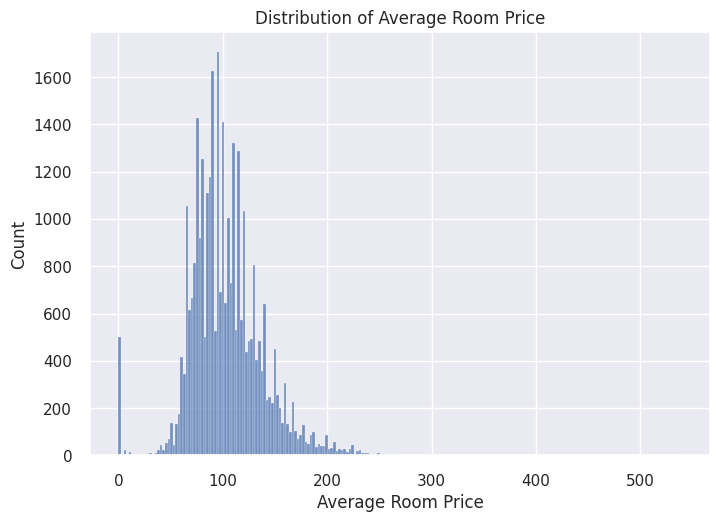

In [80]:
for col in num_cols:
    if data[col].nunique() > 17:
        sns.histplot(data = data, x=col)
        plt.title(f"Distribution of {col}")
        plt.show()
    else:
        sns.countplot(data = data, x=col, palette = color_palette, width=0.6)
        plt.title(f"Distribution of {col}")
        plt.show()

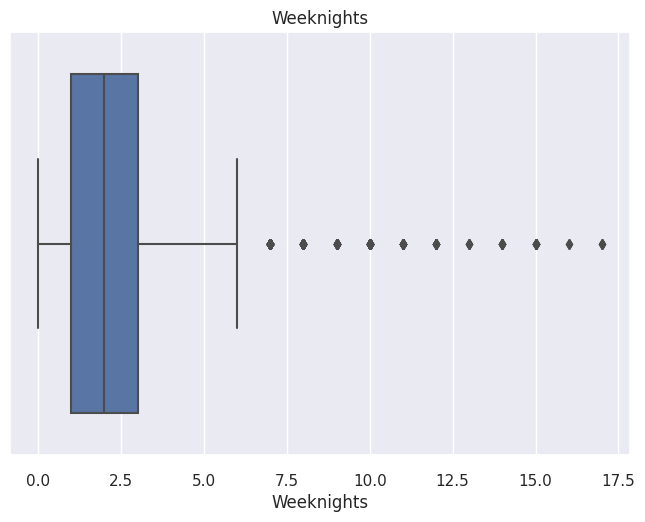

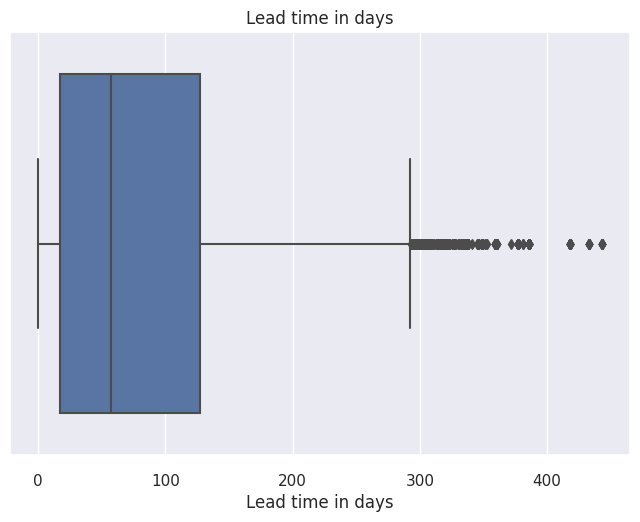

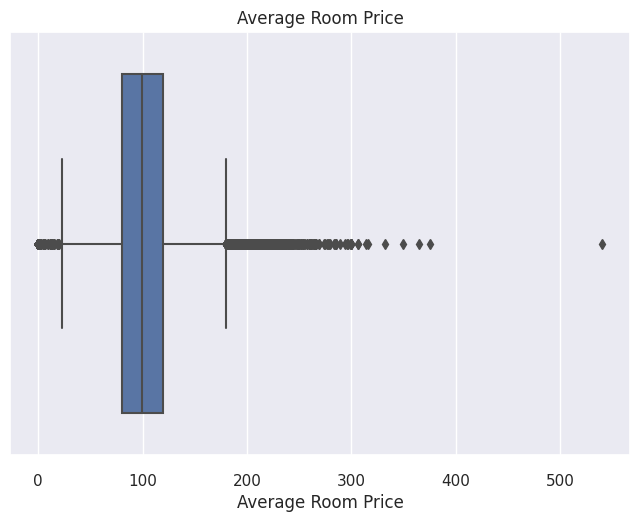

In [81]:
for col in ['Weeknights', 'Lead time in days', 'Average Room Price']:
    sns.boxplot(data = data, x= col)
    plt.title(col)
    plt.show()

In [82]:
# checking for skewness in histograms

cols = ['Weeknights', 'Lead time in days', 'Average Room Price']
data[cols].skew()

Weeknights            1.631408
Lead time in days     1.289760
Average Room Price    0.686148
dtype: float64

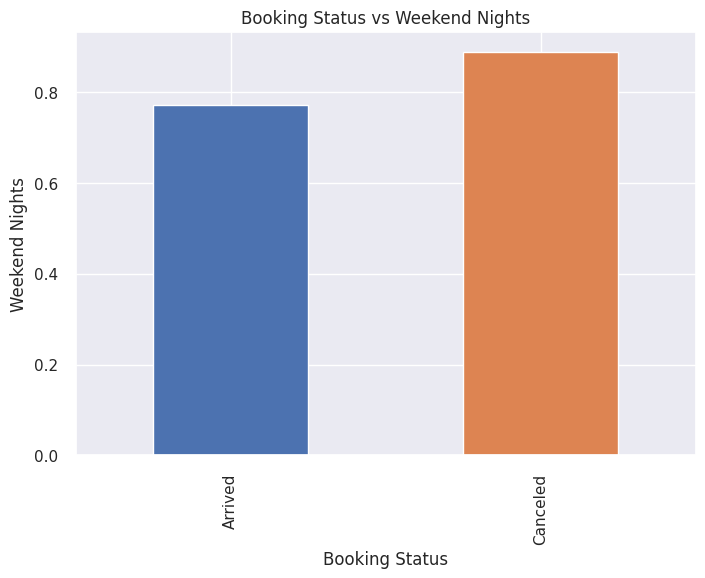

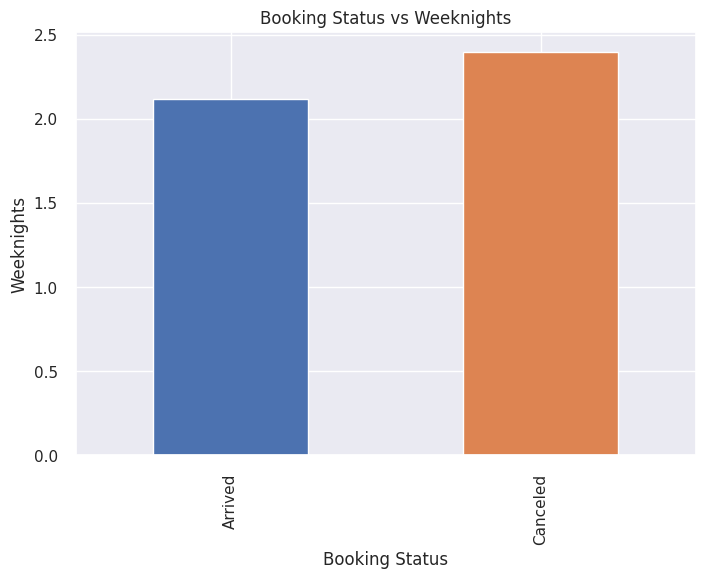

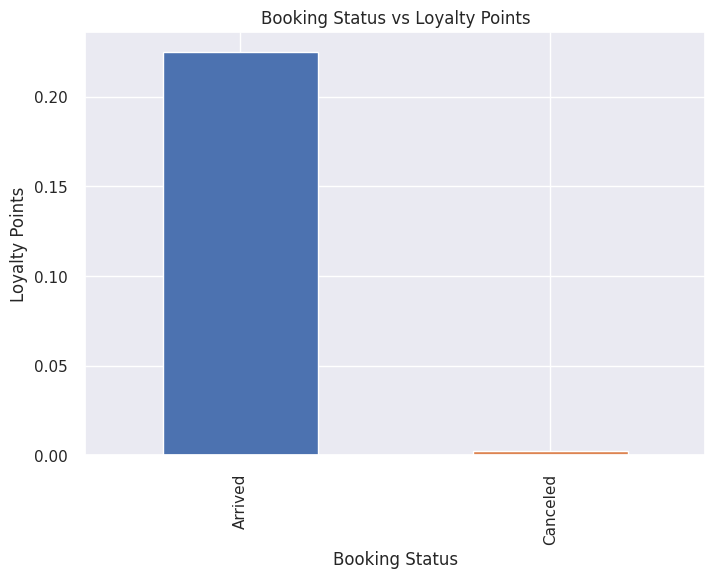

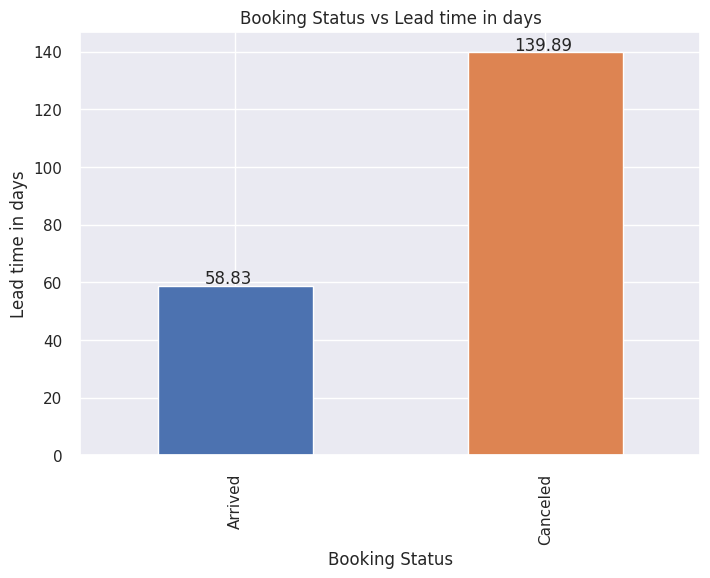

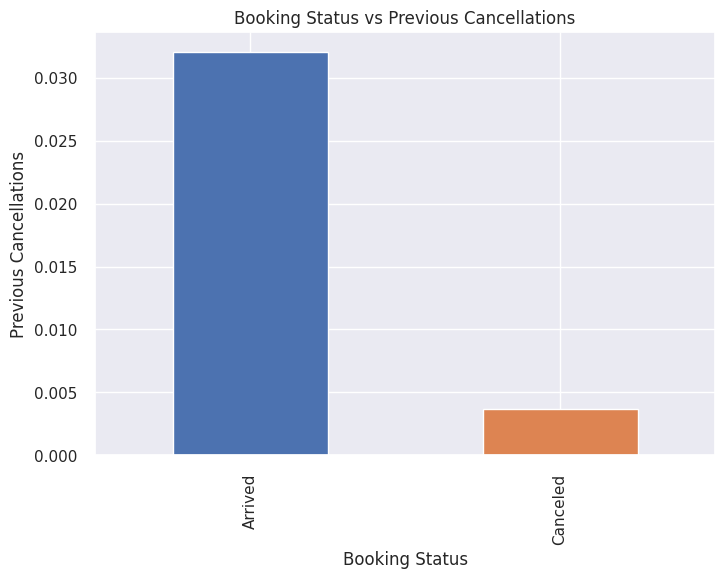

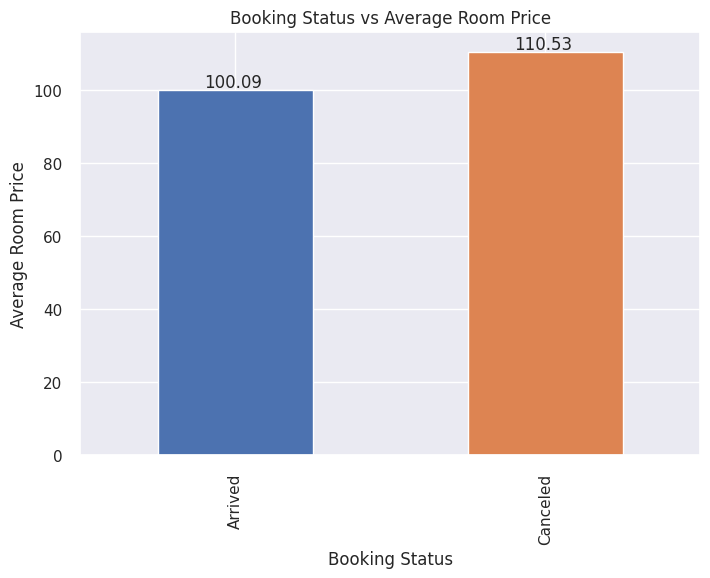

In [83]:
for col in num_cols:
    ax = data.groupby('Booking Status')[col].mean().plot(kind='bar', color=['C0', 'C1'])
    for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.65))
    plt.ylabel(col)
    plt.title(f"{target} vs {col}")
    plt.show()

* Next, we explored the numerical features and how they affect the Booking Status. The distribution of the Average Room Price shows it is almost symmetrical. Using the skew function, it had a skew value of 0.686. Also, the distribution of lead time in days shows the long tail. The lead time in day had a skewness of 1.289. These skewness are not really high so we used the standard scaler to scale them for the ML model.

* We see that features like Weekend Nights, Weeknights, Lead time in days, and Average Room Price had higher mean values for canceled bookings than arrived bookings. A feature worth looking at is the lead time in days ( Figure 14D) which shows the disparity between the mean value of canceled bookings(139.89) and the mean value of arrived bookings(58.89). This shows that arrived bookings had lower lead time in days than canceled bookings. We also see that canceled bookings had little or no loyalty points when compared to that of arrived bookings.

In [84]:
# removing redundant columns and columns which might add noise to the dataset
data.drop(columns=['Booking_ID','FromDate'], inplace = True)

In [85]:
# encoding target column
data["Booking Status"] = (data["Booking Status"] == "Canceled").map(lambda x: int(x))

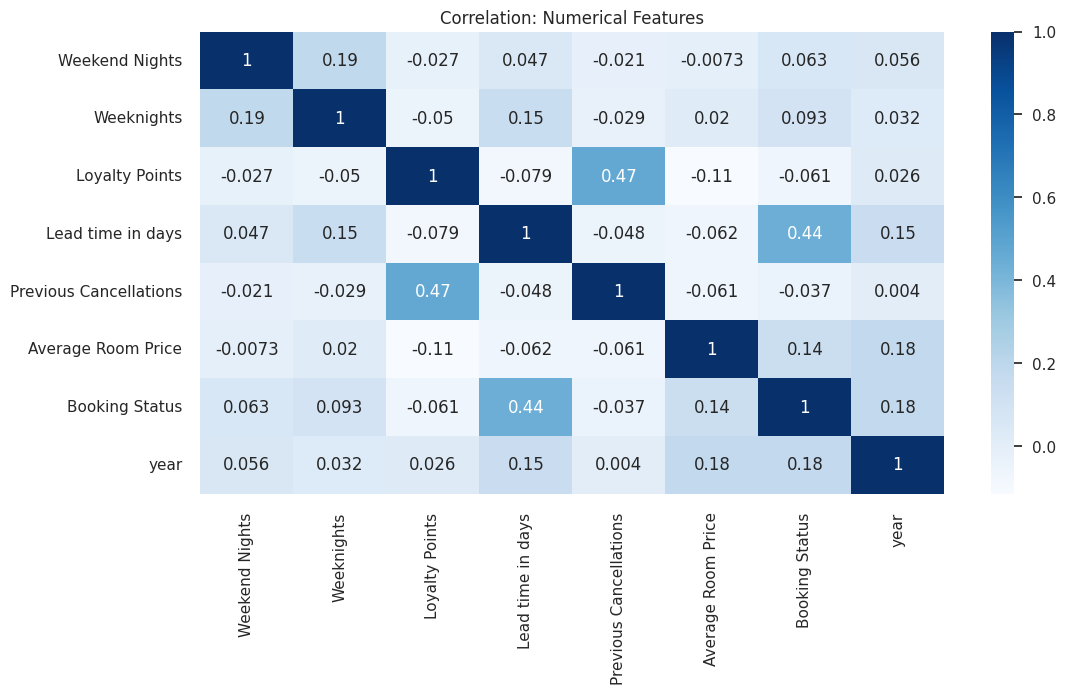

In [86]:
plt.figure(figsize = [12,6])
sns.heatmap(data.corr(numeric_only= True), annot = True, cmap="Blues")
plt.title("Correlation: Numerical Features");

* we see the correlation heatmap of numerical features in the dataset. Notable correlations are between Loyalty points and previous cancellations, Booking Status and Lead time in days. 

In [87]:
data.head()

,RoomType,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Previous Cancellations,Average Room Price,Booking Status,month,day,year
0,Neptune,2,0,Buffet,1,0,1,3,0,219,Online,0,0,102.85,1,October,Wednesday,2018
1,Venus,2,0,Buffet,1,0,2,2,0,23,Online,0,0,133.55,0,December,Sunday,2018
2,Neptune,2,0,Buffet,1,0,2,3,0,303,Offline,0,0,78.00,0,August,Sunday,2018
3,Venus,2,0,Buffet,0,0,1,2,0,133,Online,0,0,113.60,1,August,Wednesday,2018
4,Neptune,1,0,Buffet,0,0,0,2,0,70,Online,0,0,121.50,1,August,Friday,2018


<a id = "cell_modeling"></a>
## 3. Machine learning model development


In [88]:
cat_cols = ['RoomType',
 'Adults',
 'Children',
 'Breakfast',
 'Number of Special Requests',
 'Airport Pickup',
 'Booking Type',
 'Existing Customer',
 'month','day']

num_cols = ['Weekend Nights',
 'Weeknights',
 'Loyalty Points',
 'Lead time in days',
 'Previous Cancellations',
 'Average Room Price',
 'year']

In [89]:
# Code

from sklearn.model_selection import train_test_split

target = "Booking Status"
X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22848, 17), (9792, 17), (22848,), (9792,))

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import time

# Defining the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols), # scaling numeric columns
        ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols) # one-hot encoding categorical column
    ])

# Define models
models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, eval_metric='auc'))
]

# Define pipeline

for model in models:
    start = time.time()
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        model
    ])

    # Fit pipeline on training data
    pipeline.fit(X_train, y_train)
    end = time.time()

    train_time = end-start

    # Evaluate pipeline on test data
    model_name = str(model).split(",")[0].replace("(", "")
    y_pred = pipeline.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_pred)
    print(f"%3s - AUC: %3f TRAIN TIME: %3f"%(model_name, auc, train_time))

'rf' - AUC: 0.949695 TRAIN TIME: 26.519107
'gb' - AUC: 0.912486 TRAIN TIME: 4.123906
'xgb' - AUC: 0.951450 TRAIN TIME: 4.352542


* Based on the above results, Xgboost gives the highest AUC of 0.95 and it trains very quick and is lightweight.
* So for this task, we will be using the xgboost model

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', XGBClassifier(random_state=42, eval_metric='auc'))
    ])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred)

print(auc)

0.9514501234585278


In [92]:
from sklearn import set_config

set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Weekend Nights',
                                                   'Weeknights',
                                                   'Loyalty Points',
                                                   'Lead time in days',
                                                   'Previous Cancellations',
                                                   'Average Room Price',
                                                   'year']),
                                                 ('cat_onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['RoomType', 'Adults',
                                                   'Children', 'Breakfast',
                                                   'Number of Special Requests',
                                                   'Airport Pickup',
                                                   'Booking...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       

In [93]:
#hyperparameter tuning 
param_grid = {
    'model__learning_rate': [0.01, 0.1, 0.5, 0.6],
    'model__max_depth': [3, 5, 7, 9, 11]}


grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding AUC score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best AUC Score: ", grid_search.best_score_)

Best Hyperparameters:  {'model__learning_rate': 0.1, 'model__max_depth': 11}
Best AUC Score:  0.9515797387323126


Hyperparameter Tuning our best model produces an AUC close to the best model so we will stick to default parameters for our final model.

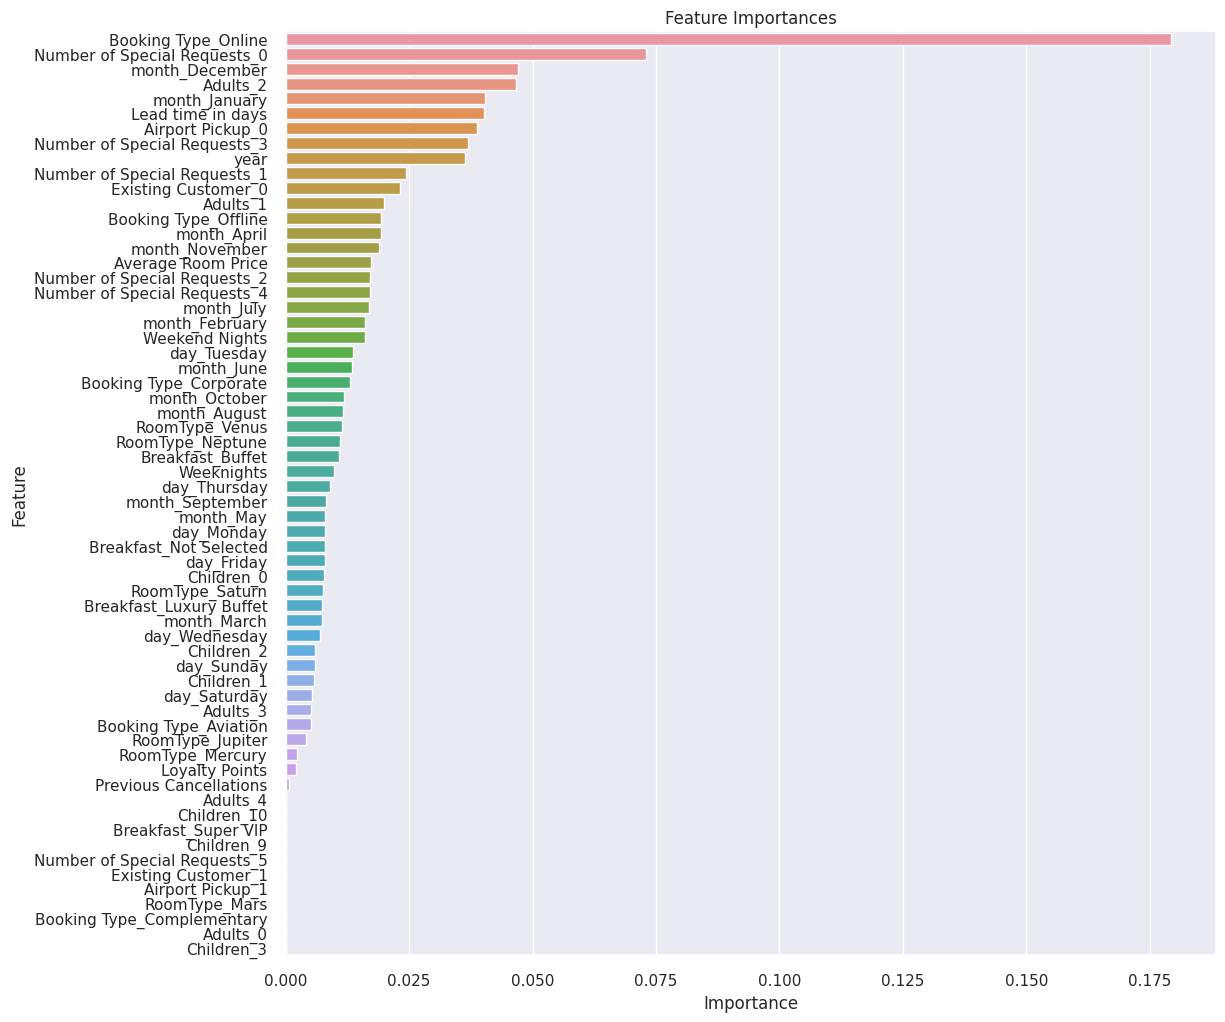

In [94]:
#feature Importance 

cat_feat = preprocessor.named_transformers_['cat_onehot'].get_feature_names_out()
num_feat = preprocessor.named_transformers_['num'].get_feature_names_out()
feature_names = np.concatenate((num_feat, cat_feat))

importances = pipeline.named_steps['model'].feature_importances_

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize = [12,12])
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importances')
plt.show()

The top 7 features contributing to the model are:

* Booking Type_Online
* Number_of_special_requests_0
* month_December
* Adults_2
* month_January
* Lead time in days
* Airport_pickup_0

In [95]:
from sklearn.metrics import classification_report

# Predict labels for test set
y_pred = pipeline.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6569
           1       0.86      0.80      0.83      3223

    accuracy                           0.89      9792
   macro avg       0.88      0.87      0.88      9792
weighted avg       0.89      0.89      0.89      9792



Based on the classification Report, we have the following:

* Precision - 0.86
* recall - 0.80
* f1-score - 0.83
* accuracy - 0.89

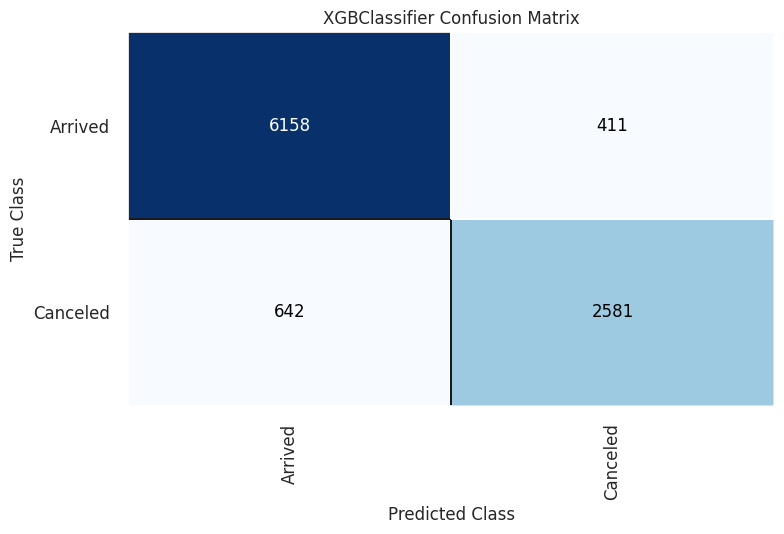

In [96]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

classes = ["Arrived", "Canceled"]
cm = confusion_matrix(y_test, y_pred, labels=[0,1])

# generate confusion matrix diagram
cm_viz = ConfusionMatrix(pipeline, classes=classes, cmap="Blues")
cm_viz.fit(X_train, y_train)
cm_viz.score(X_test, y_test)
cm_viz.show(outpath="confusion_matrix.png");

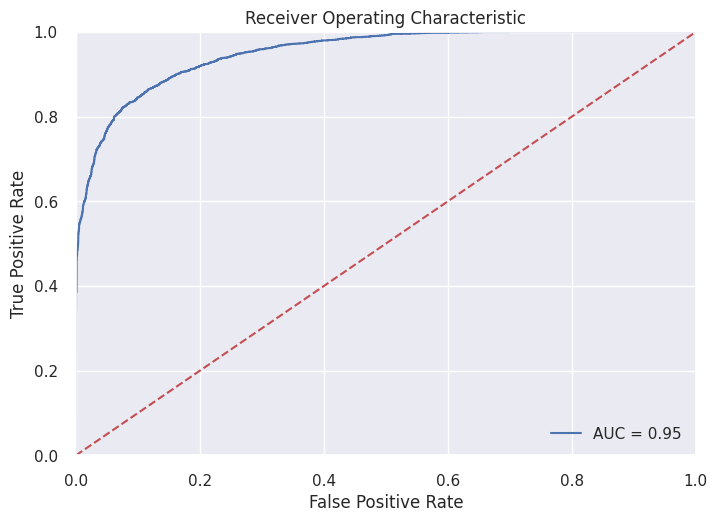

In [97]:
import sklearn.metrics as metrics

probs = pipeline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5. Competition (optional)



In [98]:
import pandas as pd

In [99]:
url_deploy = 'https://raw.githubusercontent.com/thuc-github/MIS710-T12023/main/A1/VS_Booking_deploy.csv'
df_deploy = pd.read_csv("VS_Booking_deploy.csv")


In [100]:
def transform(df):
    for col in cats_cols[:-1]:
        df[col] = df[col].astype('category')

    df['FromDate'] = df['FromDate'].replace("29/2/2018", "28/2/2018")
    df = df.drop(df[df['FromDate'] == "FromDate"].index)

    df['FromDate'] = pd.to_datetime(df['FromDate'], dayfirst=True, format = "%d/%m/%Y")
    df['Breakfast'] = df['Breakfast'].map(lambda x:x.replace(" Breakfast", ""))

    df['year'] = df['FromDate'].dt.year
    df['day'] = df['FromDate'].dt.day_name()
    df['month'] = df['FromDate'].dt.month_name()

    df.drop(columns=['Booking_ID','FromDate'], inplace = True)

   

    return df

    


In [101]:
# Apply data transformation to the deployment data, 
# ensure number of features and transformation of X and X_deploy are similar
X_deploy = transform(df_deploy)

# Apply trained model to X_deploy 
y_deploy = pipeline.predict(X_deploy)

# 
# join unseen y_deploy with predicted value into a data frame
inspection = pd.DataFrame({'Predicted':y_deploy})

# join X_test with the new dataframe
inspection = pd.concat([X_deploy, inspection], axis=1)

# Submit this results.csv file to join the competition
inspection.to_csv('results.csv') 

Reading Competition Result

In [102]:
Competition_Result = pd.read_csv("results.csv")
Competition_Result

,Unnamed: 0,RoomType,Adults,Children,Breakfast,Number of Special Requests,Airport Pickup,Weekend Nights,Weeknights,Loyalty Points,Lead time in days,Booking Type,Existing Customer,Previous Cancellations,Average Room Price,year,day,month,Predicted
0,0,Neptune,1.0,0.0,Buffet,0.0,1.0,0.0,1.0,0.0,2.0,Corporate,0.0,0.0,67.00,2018.0,Sunday,December,0.0
1,1,Neptune,2.0,0.0,Buffet,1.0,0.0,1.0,0.0,0.0,13.0,Offline,0.0,0.0,85.00,2018.0,Tuesday,March,0.0
2,2,Neptune,2.0,0.0,Buffet,1.0,0.0,2.0,2.0,0.0,93.0,Online,0.0,0.0,82.45,2018.0,Sunday,April,0.0
3,3,Neptune,1.0,0.0,Buffet,0.0,0.0,0.0,2.0,0.0,3.0,Offline,0.0,0.0,95.00,2018.0,Sunday,June,0.0
4,4,Neptune,2.0,1.0,Buffet,2.0,0.0,2.0,5.0,0.0,106.0,Online,0.0,0.0,106.75,2017.0,Saturday,July,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623,3624,Neptune,2.0,0.0,Buffet,0.0,0.0,2.0,2.0,0.0,250.0,Online,0.0,0.0,90.95,2018.0,Sunday,October,1.0
3624,3625,Neptune,2.0,0.0,Not Selected,0.0,0.0,1.0,1.0,0.0,268.0,Online,0.0,0.0,95.40,2018.0,Monday,October,0.0
3625,3626,Neptune,2.0,0.0,Buffet,0.0,0.0,0.0,2.0,0.0,79.0,Offline,0.0,0.0,75.00,2017.0,Monday,November,0.0
3626,3627,Neptune,2.0,0.0,Luxury Buffet,0.0,0.0,0.0,2.0,0.0,74.0,Offline,0.0,0.0,101.50,2017.0,Monday,September,NaN
